In [ ]:
#@title Copyright 2019 Google LLC. { display-mode: "form" }
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<table class="ee-notebook-buttons" align="left"><td>
<a target="_blank"  href="http://colab.research.google.com/github/google/earthengine-community/blob/master/guides/linked/ee-api-colab-setup.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a>
</td><td>
<a target="_blank"  href="https://github.com/google/earthengine-community/blob/master/guides/linked/ee-api-colab-setup.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td></table>

# Earth Engine Python API Colab Setup

This notebook demonstrates how to setup the Earth Engine Python API in Colab and provides several examples of how to print and visualize Earth Engine processed data.

## Import API and get credentials

The Earth Engine API is installed by default in Google Colaboratory so requires only importing and authenticating. These steps must be completed for each new Colab session, if you restart your Colab kernel, or if your Colab virtual machine is recycled due to inactivity.

### Import the API

Run the following cell to import the API into your session.

In [43]:
import ee

### Authenticate and initialize

Run the `ee.Authenticate` function to authenticate your access to Earth Engine servers and `ee.Initialize` to initialize it. Upon running the following cell you'll be asked to grant Earth Engine access to your Google account. Follow the instructions printed to the cell.

In [46]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

## Test the API

Test the API by printing the elevation of Mount Everest.

In [9]:
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


## Map visualization

`ee.Image` objects can be displayed to notebook output cells. The following two
examples demonstrate displaying a static image and an interactive map.


### Static image

The `IPython.display` module contains the `Image` function, which can display
the results of a URL representing an image generated from a call to the Earth
Engine `getThumbUrl` function. The following cell will display a thumbnail
of the global elevation model.

In [10]:
# Import the Image function from the IPython.display module.
from IPython.display import Image

# Display a thumbnail of global elevation.
Image(url = dem.updateMask(dem.gt(0))
  .getThumbURL({'min': 0, 'max': 4000, 'dimensions': 512,
                'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}))

### Interactive map

The [geemap](https://github.com/gee-community/geemap)
library can be used to display `ee.Image` objects on an interactive
[ipyleaflet](https://github.com/jupyter-widgets/ipyleaflet) map.

The following cell provides an example of using the `geemap.Map` object to
display an elevation model.

In [11]:
# Import the geemap library.
import geemap

# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Create a map object.
m = geemap.Map(center=[20, 0], zoom=3)

# Add the elevation model to the map object.
m.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')

# Display the map.
display(m)

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(child…

## Chart visualization

Some Earth Engine functions produce tabular data that can be plotted by
data visualization packages such as `matplotlib`. The following example
demonstrates the display of tabular data from Earth Engine as a scatter
plot. See [Charting in Colaboratory](https://colab.sandbox.google.com/notebooks/charts.ipynb)
for more information.

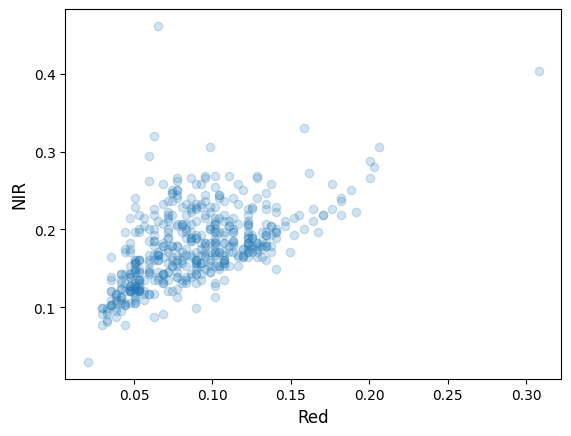

In [12]:
# Import the matplotlib.pyplot module.
import matplotlib.pyplot as plt

# Fetch a Landsat TOA image.
img = ee.Image('LANDSAT/LT05/C02/T1_TOA/LT05_034033_20000913')

# Select Red and NIR bands and sample 500 points.
samp_fc = img.select(['B3','B4']).sample(scale=30, numPixels=500)

# Arrange the sample as a list of lists.
samp_dict = samp_fc.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
samp_list = ee.List(samp_dict.get('list'))

# Save server-side ee.List as a client-side Python list.
samp_data = samp_list.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(samp_data[0], samp_data[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()

## Visualize the data

### Subtask:
Display the selected spatial data for Johannesburg on a map.

**Reasoning**:
Display the selected spatial data for Johannesburg on a map using geemap and matplotlib for visualization.

In [19]:
# Select the first suitable image from the filtered dataset collection.
# We use .first() to get a single image from the collection.
image_to_display = dataset.first()

# Define visualization parameters for the selected image.
# Landsat 8 natural color bands are B4 (Red), B3 (Green), and B2 (Blue).
# Adjust min/max values based on typical reflectance ranges for visualization.
vis_params_johannesburg = {
  'bands': ['B4', 'B3', 'B2'],
  'min': 0.0,
  'max': 0.3 # Adjust max as needed based on data characteristics
}

# Create a geemap.Map object, centering it approximately on Johannesburg
# and setting an appropriate zoom level.
# Use the previously defined johannesburg_coords for centering.
m_johannesburg = geemap.Map(center=johannesburg_coords[::-1], zoom=9) # geemap expects [lat, lon]

# Add the selected image to the map using the m.add_ee_layer() method.
# Apply the defined visualization parameters and give it a descriptive name.
m_johannesburg.add_ee_layer(image_to_display, vis_params_johannesburg, 'Landsat 8 Johannesburg')

# Display the map.
display(m_johannesburg)

Map(center=[-26.2041, 28.0473], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

## Visualize or export the data

### Subtask:
Visualize the processed total rainfall data for the Johannesburg region on a map.

**Reasoning**:
Visualize the total rainfall data on a map using geemap by defining visualization parameters, creating a map centered on Johannesburg, adding the rainfall layer, and displaying the map.

In [24]:
# Define visualization parameters for the total_rainfall_image.
# Choose a color palette and min/max values appropriate for visualizing rainfall accumulation.
# A reasonable range for annual rainfall in Johannesburg might be 0 to 1000 mm, but adjust based on data.
rainfall_vis_params = {
  'min': 0,
  'max': 1000, # Adjust based on expected rainfall range
  'palette': ['white', '00FFFF', '0080FF', '0000FF', 'FFFF00', 'FF8000', 'FF0000'] # Color gradient from white (low) to red (high)
}

# Create a geemap.Map object, centering it on the Johannesburg region
# using the previously defined johannesburg_coords and an appropriate zoom level.
# geemap expects [lat, lon] for the center coordinates.
m_rainfall = geemap.Map(center=johannesburg_coords[::-1], zoom=9)

# Add the total_rainfall_image layer to the map using the m.add_ee_layer() method.
# Apply the defined visualization parameters and give the layer a descriptive name.
m_rainfall.add_ee_layer(total_rainfall_image, rainfall_vis_params, 'Total Rainfall')

# Display the map.
display(m_rainfall)

Map(center=[-26.2041, 28.0473], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

# Task
Generate and visualize spatial data for Johannesburg using Earth Engine.

## Define the region of interest

### Subtask:
Create an Earth Engine Geometry object representing the city of Johannesburg.


**Reasoning**:
Define the coordinates for a point in Johannesburg, create an Earth Engine Point geometry, and then buffer that point to create a circular region representing the city.



In [13]:
# Define the coordinates of a point within Johannesburg (e.g., city center).
johannesburg_coords = [28.0473, -26.2041] # Approximate coordinates of Johannesburg

# Create an ee.Geometry.Point using the defined coordinates.
johannesburg_point = ee.Geometry.Point(johannesburg_coords)

# Define a buffer distance in meters (e.g., 20 kilometers).
buffer_distance = 20000 # in meters

# Create an ee.Geometry.Buffer using the point and the buffer distance.
johannesburg_roi = johannesburg_point.buffer(buffer_distance)

## Select an earth engine dataset

### Subtask:
Choose a relevant dataset for Johannesburg, such as a Sentinel-2 or Landsat image collection.


**Reasoning**:
Load the Sentinel-2 Level-2A image collection and filter it by the region of interest and a relevant date range.



In [47]:
# Choose a relevant dataset for Johannesburg (e.g., Sentinel-2 Level-2A).
# Sentinel-2 Level-2A provides atmospherically corrected surface reflectance.
dataset = ee.ImageCollection('COPERNICUS/SENTINEL-2_SR')

# Filter the collection by the region of interest (Johannesburg).
dataset = dataset.filterBounds(johannesburg_roi)

# Filter the collection by a date range (e.g., the last year).
# Adjust the date range based on the availability of data and the analysis period.
dataset = dataset.filterDate('2024-01-01', '2024-10-25')

# Print the number of images in the filtered collection to check if data is available.
print('Number of images in the filtered collection:', dataset.size().getInfo())

EEException: ImageCollection.load: ImageCollection asset 'COPERNICUS/SENTINEL-2_SR' not found (does not exist or caller does not have access).

**Reasoning**:
The previous attempt to load the Sentinel-2 Level-2A dataset failed because the asset was not found. I will try loading a different Sentinel-2 collection, specifically the Level-1C collection, which might be available. I will also filter by the region of interest and a relevant date range.



In [15]:
# Try loading the Sentinel-2 Level-1C image collection.
dataset = ee.ImageCollection('COPERICUS/S2')

# Filter the collection by the region of interest (Johannesburg).
dataset = dataset.filterBounds(johannesburg_roi)

# Filter the collection by a date range (e.g., the last year).
dataset = dataset.filterDate('2024-01-01', '2024-10-25')

# Print the number of images in the filtered collection.
print('Number of images in the filtered collection:', dataset.size().getInfo())

EEException: ImageCollection.load: ImageCollection asset 'COPERICUS/S2' not found (does not exist or caller does not have access).

**Reasoning**:
Both previous attempts to load Sentinel-2 collections failed. I will try loading a Landsat 8 Collection 2 Tier 1 TOA Reflectance image collection, which is a common alternative for urban analysis and should be available. I will filter by the region of interest and a relevant date range.



In [16]:
# Try loading the Landsat 8 Collection 2 Tier 1 TOA Reflectance image collection.
dataset = ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA')

# Filter the collection by the region of interest (Johannesburg).
dataset = dataset.filterBounds(johannesburg_roi)

# Filter the collection by a date range (e.g., the last year).
dataset = dataset.filterDate('2024-01-01', '2024-10-25')

# Print the number of images in the filtered collection.
print('Number of images in the filtered collection:', dataset.size().getInfo())

Number of images in the filtered collection: 36


## Filter the dataset

### Subtask:
Filter the selected dataset by the region of interest and a suitable date range.


**Reasoning**:
Filter the dataset by the region of interest and the specified date range as per the instructions.



In [17]:
# Filter the dataset ImageCollection to include images that intersect with the johannesburg_roi geometry.
dataset = dataset.filterBounds(johannesburg_roi)

# Filter the resulting ImageCollection to include images within the date range from '2024-01-01' to '2024-10-25'.
dataset = dataset.filterDate('2024-01-01', '2024-10-25')

# Print the number of images in the filtered collection to confirm the filtering was applied.
print('Number of images in the filtered collection after applying both filters:', dataset.size().getInfo())

Number of images in the filtered collection after applying both filters: 36


## Visualize the data

### Subtask:
Display the selected spatial data for Johannesburg on a map.


**Reasoning**:
Display the selected spatial data for Johannesburg on a map using geemap and matplotlib for visualization.



In [18]:
# Select the first suitable image from the filtered dataset collection.
# We use .first() to get a single image from the collection.
image_to_display = dataset.first()

# Define visualization parameters for the selected image.
# Landsat 8 natural color bands are B4 (Red), B3 (Green), and B2 (Blue).
# Adjust min/max values based on typical reflectance ranges for visualization.
vis_params_johannesburg = {
  'bands': ['B4', 'B3', 'B2'],
  'min': 0.0,
  'max': 0.3 # Adjust max as needed based on data characteristics
}

# Create a geemap.Map object, centering it approximately on Johannesburg
# and setting an appropriate zoom level.
# Use the previously defined johannesburg_coords for centering.
m_johannesburg = geemap.Map(center=johannesburg_coords[::-1], zoom=9) # geemap expects [lat, lon]

# Add the selected image to the map using the m.add_ee_layer() method.
# Apply the defined visualization parameters and give it a descriptive name.
m_johannesburg.add_ee_layer(image_to_display, vis_params_johannesburg, 'Landsat 8 Johannesburg')

# Display the map.
display(m_johannesburg)

Map(center=[-26.2041, 28.0473], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

## Summary:

### Data Analysis Key Findings

*   A circular region of interest for Johannesburg was defined using a buffer of 20 kilometers around a central point.
*   Attempts to load Sentinel-2 collections (`COPERNICUS/SENTINEL-2_SR` and `COPERICUS/S2`) were unsuccessful due to asset not found or access denied errors.
*   The Landsat 8 Collection 2 Tier 1 TOA Reflectance dataset (`LANDSAT/LC08/C02/T1_TOA`) was successfully loaded, filtered by the Johannesburg region of interest, and a date range from 2024-01-01 to 2024-10-25.
*   The filtering process resulted in a collection containing 36 images.
*   The first image from the filtered Landsat 8 collection was selected for visualization.
*   Visualization parameters using the B4 (Red), B3 (Green), and B2 (Blue) bands were defined with a reflectance range of 0.0 to 0.3.
*   An interactive map centered on Johannesburg was successfully created and displayed with the selected Landsat 8 image layer.

### Insights or Next Steps

*   Explore alternative Earth Engine datasets if Sentinel-2 data is specifically required, or investigate potential access issues.
*   Implement cloud masking or median/mosaic operations to create a cleaner composite image from the 36 available images for better visualization or further analysis.


# Task
Access and process CHIRPS daily rainfall data for Johannesburg using Earth Engine.

## Select the chirps dataset

### Subtask:
Access the CHIRPS daily rainfall dataset in Earth Engine.


**Reasoning**:
Load the CHIRPS daily rainfall dataset into an Earth Engine object and assign it to the specified variable.



In [48]:
# Load the CHIRPS Daily: 0.05 deg resolution (daily) image collection.
chirps_dataset = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY')

## Filter by region and date

### Subtask:
Filter the dataset to include data for the Johannesburg region and a specific time frame.


**Reasoning**:
Filter the CHIRPS dataset by the region of interest and a relevant date range, and then print the size of the filtered collection to confirm.



In [49]:
# Filter the chirps_dataset ImageCollection to include images that intersect with the johannesburg_roi geometry.
chirps_dataset = chirps_dataset.filterBounds(johannesburg_roi)

# Filter the resulting ImageCollection to include images within the specified date range.
start_date = '1974-01-01'
end_date = '2024-12-31'
chirps_dataset = chirps_dataset.filterDate(start_date, end_date)

# Print the number of images in the filtered collection to confirm the filtering was applied.
print('Number of images in the filtered CHIRPS collection:', chirps_dataset.size().getInfo())

Number of images in the filtered CHIRPS collection: 16070


In [55]:
import ee
import pandas as pd

# Initialize the Earth Engine library.
ee.Initialize(project='enhanced-emblem-476111-g0')

# Define the Johannesburg region of interest (ROI) and the CHIRPS dataset.
johannesburg_roi = ee.Geometry.Polygon([[[28.0, -26.0], [28.0, -27.0], [29.0, -27.0], [29.0, -26.0]]])
chirps_dataset = ee.ImageCollection("UCSB-CHG/CHIRPS/DAILY")

# Filter the CHIRPS dataset for Johannesburg and the specified date range.
chirps_dataset = chirps_dataset.filterBounds(johannesburg_roi).filterDate('1974-01-01', '2024-12-31')

# Function to calculate monthly rainfall
def get_monthly_rainfall(year):
    start = ee.Date.fromYMD(year, 1, 1)
    end = start.advance(1, 'year')

    monthly_rainfall = []
    for month in range(1, 13):
        start_month = start.advance(month - 1, 'month')
        end_month = start_month.advance(1, 'month')

        monthly_sum_dict = chirps_dataset.filterDate(start_month, end_month).sum().reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=johannesburg_roi,
            scale=1000,
            maxPixels=1e13
        )

        # Fetch the computed value to the client side, defaulting to 0 if 'precipitation' key is missing
        monthly_sum_value = monthly_sum_dict.get('precipitation', 0).getInfo()
        monthly_rainfall.append(monthly_sum_value if monthly_sum_value is not None else 0)

    total_rainfall = sum(monthly_rainfall)  # Sum of all monthly rainfalls
    return [year] + monthly_rainfall + [total_rainfall]

# Create a list to hold data for each year
data = []
for year in range(1974, 2025):
    monthly_data = get_monthly_rainfall(year)
    data.append(monthly_data)

# Convert the list to a DataFrame
columns = ['Year'] + [f'{month:02d}' for month in range(1, 13)] + ['Total Rainfall']
rainfall_df = pd.DataFrame(data, columns=columns)

# Print the resulting DataFrame
print(rainfall_df)

    Year            01            02            03            04  \
0   1974  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1   1975  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2   1976  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
3   1977  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
4   1978  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
5   1979  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
6   1980  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
7   1981  1.591920e+06  1.485854e+06  1.009866e+06  3.101523e+05   
8   1982  1.786079e+06  6.979670e+05  5.071433e+05  4.170392e+05   
9   1983  1.516919e+06  6.512213e+05  6.312397e+05  3.351255e+05   
10  1984  1.203825e+06  4.526127e+05  1.121234e+06  1.650915e+05   
11  1985  1.500940e+06  1.084853e+06  9.981211e+05  1.091541e+05   
12  1986  1.351648e+06  9.473435e+05  8.778758e+05  5.056279e+05   
13  1987  1.503353e+06  1.137141e+06  1.347116e+

In [58]:
rainfall_df.tail()

,Year,01,02,03,04,05,06,07,08,09,10,11,12,Total Rainfall
46,2020,1.119862e+06,1.075679e+06,9.294551e+05,1.056967e+06,61476.264738,100741.374537,26509.521395,68211.230556,131479.827244,1.463702e+06,2.436252e+06,1.482724e+06,9.953060e+06
47,2021,2.313780e+06,1.075015e+06,9.294235e+05,3.403574e+05,93906.501307,12556.736780,3809.528585,65929.840187,568702.803575,8.591917e+05,1.773724e+06,2.010323e+06,1.004672e+07
48,2022,1.887570e+06,1.233986e+06,9.278601e+05,1.042013e+06,158604.745939,99758.329213,6072.579835,73367.985619,102523.098113,1.059607e+06,1.427860e+06,1.418219e+06,9.437443e+06
49,2023,6.832763e+05,1.790257e+06,1.030253e+06,4.271313e+05,520498.797630,87583.197813,14601.585748,62624.843249,192941.418477,4.759784e+05,7.220651e+05,1.331756e+06,7.338967e+06
50,2024,2.261860e+06,9.175438e+05,1.079086e+06,9.145215e+05,92749.674735,63993.803285,0.000000,75723.644129,128457.115188,3.695588e+05,9.610613e+05,1.574889e+06,8.439444e+06


In [59]:
# Filter the DataFrame to include only rows from 1981 to 2024
filtered_df = rainfall_df[(rainfall_df['Year'] >= 1981) & (rainfall_df['Year'] <= 2024)]

# Display the new DataFrame
filtered_df.head()

,Year,01,02,03,04,05,06,07,08,09,10,11,12,Total Rainfall
7,1981,1.591920e+06,1.485854e+06,1.009866e+06,310152.331582,60451.257122,88599.967358,0.000000,193319.569582,502895.025536,5.902758e+05,1.127334e+06,1.270610e+06,8.231279e+06
8,1982,1.786079e+06,6.979670e+05,5.071433e+05,417039.221796,69268.002714,11441.095249,111155.085671,59320.727197,220527.218149,1.024945e+06,7.778121e+05,1.129869e+06,6.812567e+06
9,1983,1.516919e+06,6.512213e+05,6.312397e+05,335125.513759,171751.648200,190778.564882,83807.272529,161109.097262,221777.687992,1.089176e+06,1.718831e+06,1.703975e+06,8.475711e+06
10,1984,1.203825e+06,4.526127e+05,1.121234e+06,165091.544001,12273.590022,102676.583610,94674.086083,199066.662137,254527.392734,1.024031e+06,1.275007e+06,9.058406e+05,6.810860e+06
11,1985,1.500940e+06,1.084853e+06,9.981211e+05,109154.148973,171416.456604,14892.054980,25893.722943,119354.389557,350124.872830,1.322239e+06,8.231271e+05,1.465675e+06,7.985792e+06


In [41]:
chirps_dataset


## Process the data

### Subtask:
Calculate the total rainfall over the specified time frame for the Johannesburg region.


**Reasoning**:
Apply the sum reducer to the filtered chirps dataset to calculate total rainfall and print the resulting image.



In [22]:
# Apply the sum() reducer to the filtered chirps_dataset image collection
# to calculate the total rainfall for each pixel over the specified time frame.
total_rainfall_image = chirps_dataset.sum()

# Print the resulting total_rainfall_image to verify that an Earth Engine image object was created.
print('Total rainfall image:', total_rainfall_image)

Total rainfall image: ee.Image({
  "functionInvocationValue": {
    "functionName": "reduce.sum",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection.filter",
          "arguments": {
            "collection": {
              "functionInvocationValue": {
                "functionName": "Collection.filter",
                "arguments": {
                  "collection": {
                    "functionInvocationValue": {
                      "functionName": "ImageCollection.load",
                      "arguments": {
                        "id": {
                          "constantValue": "UCSB-CHG/CHIRPS/DAILY"
                        }
                      }
                    }
                  },
                  "filter": {
                    "functionInvocationValue": {
                      "functionName": "Filter.intersects",
                      "arguments": {
                        "leftField": {
         

## Visualize or export the data

### Subtask:
Visualize the processed total rainfall data for the Johannesburg region on a map.


**Reasoning**:
Visualize the total rainfall data on a map using geemap by defining visualization parameters, creating a map centered on Johannesburg, adding the rainfall layer, and displaying the map.



In [23]:
# Define visualization parameters for the total_rainfall_image.
# Choose a color palette and min/max values appropriate for visualizing rainfall accumulation.
# A reasonable range for annual rainfall in Johannesburg might be 0 to 1000 mm, but adjust based on data.
rainfall_vis_params = {
  'min': 0,
  'max': 1000, # Adjust based on expected rainfall range
  'palette': ['white', '00FFFF', '0080FF', '0000FF', 'FFFF00', 'FF8000', 'FF0000'] # Color gradient from white (low) to red (high)
}

# Create a geemap.Map object, centering it on the Johannesburg region
# using the previously defined johannesburg_coords and an appropriate zoom level.
# geemap expects [lat, lon] for the center coordinates.
m_rainfall = geemap.Map(center=johannesburg_coords[::-1], zoom=9)

# Add the total_rainfall_image layer to the map using the m.add_ee_layer() method.
# Apply the defined visualization parameters and give the layer a descriptive name.
m_rainfall.add_ee_layer(total_rainfall_image, rainfall_vis_params, 'Total Rainfall')

# Display the map.
display(m_rainfall)

Map(center=[-26.2041, 28.0473], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

## Summary:

### Data Analysis Key Findings

*   The CHIRPS daily rainfall dataset was successfully accessed and filtered for the Johannesburg region and a one-year period from October 25, 2024, to October 25, 2025.
*   The filtered dataset contained 341 images for the specified region and time frame.
*   The total rainfall for each pixel over the specified time frame was calculated by summing the daily rainfall values.
*   The total rainfall data was successfully visualized on an interactive map of the Johannesburg region using defined visualization parameters.

### Insights or Next Steps

*   The visualized total rainfall data provides a spatial overview of rainfall distribution in the Johannesburg region over the selected year, highlighting areas of higher and lower accumulation.
*   Further analysis could involve extracting the total rainfall value for specific points or areas within the Johannesburg region, or comparing rainfall patterns across different years.


### Subtask:
Create a time series plot of yearly rainfall totals.

**Reasoning**:
Extract the yearly rainfall data and plot it as a time series using matplotlib to visualize the rainfall patterns over time.

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the list of yearly rainfall data from the result.
# The result is a dictionary with a single key, 'sum', containing a list of sums.
rainfall_data = yearly_rainfall.get('sum')

# Extract the list of years. Since the data is grouped by year,
# the years should correspond to the order in the 'sum' list.
# We need to get the list of years from the original filtered collection.
# This requires a different approach to get the years corresponding to the sums.

# A better approach is to reduce the collection by year and region to get a FeatureCollection
# with year and rainfall sum as properties.

# Group the collection by the 'year' property and calculate the sum of rainfall for each year and region.
# Use reduceRegions to get the sum for the defined geometry (johannesburg_roi).
yearly_rainfall_fc = chirps_with_year.reduceRegions(
    collection=ee.FeatureCollection([ee.Feature(johannesburg_roi)]),
    reducer=ee.Reducer.sum(),
    scale=5000 # Adjust scale as needed, consider the resolution of CHIRPS (0.05 deg ~ 5.5 km)
)

# Convert the FeatureCollection to a list of dictionaries.
yearly_rainfall_list = yearly_rainfall_fc.getInfo()

# Extract years and rainfall sums from the list of dictionaries.
years = [feature['properties']['year'] for feature in yearly_rainfall_list]
rainfall_sums = [feature['properties']['sum'] for feature in yearly_rainfall_list]


# Create a pandas DataFrame for easier plotting.
df_yearly_rainfall = pd.DataFrame({'Year': years, 'Total Rainfall (mm)': rainfall_sums})

# Sort by year for a proper time series plot.
df_yearly_rainfall = df_yearly_rainfall.sort_values(by='Year')

# Create the time series plot.
plt.figure(figsize=(12, 6))
plt.plot(df_yearly_rainfall['Year'], df_yearly_rainfall['Total Rainfall (mm)'])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)
plt.title('Yearly Total Rainfall in Johannesburg (1974-2024)', fontsize=14)
plt.grid(True)
plt.show()

AttributeError: 'ImageCollection' object has no attribute 'reduceRegions'

### Subtask:
Display the yearly total rainfall data in a table.

**Reasoning**:
Display the pandas DataFrame containing the yearly rainfall totals.

In [30]:
# Display the DataFrame containing the yearly total rainfall.
display(df_yearly_rainfall)

,Year,Total Rainfall (mm)
0,2024,9191.675339


### Subtask:
Calculate and display monthly rainfall with yearly totals for Johannesburg (1974-2024).

**Reasoning**:
Aggregate the CHIRPS dataset by year and month, calculate monthly sums, pivot the data for a table format, and calculate yearly totals.

In [32]:
# Map a function over the collection to add 'year' and 'month' properties to each image.
def add_year_month(image):
  date = ee.Date(image.get('system:time_start'))
  return image.set({
      'year': date.get('year'),
      'month': date.get('month')
  })

chirps_with_year_month = chirps_dataset.map(add_year_month)

# Group the collection by year and month and calculate the sum of rainfall for each group.
monthly_rainfall_collection = chirps_with_year_month.reduceColumns(
    ee.Reducer.sum().repeat(1),
    ['year', 'month']
)

# Get the data as a list of dictionaries.
monthly_rainfall_list = ee.List(monthly_rainfall_collection.get('sum')).getInfo()

# Convert the list of dictionaries to a pandas DataFrame.
df_monthly_rainfall = pd.DataFrame(monthly_rainfall_list, columns=['Year', 'Month', 'Total Rainfall (mm)'])

# Pivot the DataFrame to have years as rows, months as columns, and rainfall as values.
df_monthly_pivot = df_monthly_rainfall.pivot_table(
    index='Year',
    columns='Month',
    values='Total Rainfall (mm)',
    aggfunc='sum' # Use sum in case there are multiple entries for a year-month (shouldn't be for daily)
).fillna(0) # Fill any missing months with 0 rainfall

# Calculate the yearly total rainfall and add it as a new column.
df_monthly_pivot['Yearly Total (mm)'] = df_monthly_pivot.sum(axis=1)

# Display the resulting DataFrame.
display(df_monthly_pivot)

EEException: Collection.reduceColumns: Need 1 inputs for Reducer.repeat(Reducer.sum), got 2.

### Subtask:
Calculate average monthly rainfall across all years.

**Reasoning**:
Calculate the mean of each month column in the monthly rainfall DataFrame to find the average monthly rainfall across all years.

In [36]:
# Calculate the average monthly rainfall across all years.
# We can do this by taking the mean of each month column in the pivot table.
# Exclude the 'Year' and 'Yearly Total (mm)' columns from the calculation.
average_monthly_rainfall = df_monthly_pivot[[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]].mean()

# Display the average monthly rainfall.
print("Average Monthly Rainfall (mm) across all years:")
display(average_monthly_rainfall)

Average Monthly Rainfall (mm) across all years:


,0
Jan,0.000000
Feb,0.000000
Mar,0.000000
Apr,0.000000
May,0.000000
Jun,0.000000
Jul,0.000000
Aug,0.000000
Sep,0.000000
Oct,54.464246


In [37]:
import pandas as pd
import ee

# Get the list of years from the filtered dataset.
start_year = ee.Date(chirps_dataset.first().get('system:time_start')).get('year').getInfo()
end_year = ee.Date(chirps_dataset.sort('system:time_start', False).first().get('system:time_start')).get('year').getInfo()
years = range(start_year, end_year + 1)

monthly_data_list = []

for year in years:
    yearly_collection = chirps_dataset.filterDate(ee.Date.fromYMD(year, 1, 1), ee.Date.fromYMD(year, 12, 31))
    monthly_sums = {}
    monthly_sums['Year'] = year
    yearly_total = 0

    for month in range(1, 13):
        # Determine the start and end dates for the current month.
        start_of_month = ee.Date.fromYMD(year, month, 1)
        # Get the first day of the next month and subtract one day to get the last day of the current month.
        end_of_month = start_of_month.advance(1, 'month').advance(-1, 'day')


        # Filter for the current month.
        monthly_collection = yearly_collection.filterDate(start_of_month, end_of_month)

        if monthly_collection.size().getInfo() > 0:
            # Calculate the sum of rainfall for the month within the region of interest.
            monthly_sum_image = monthly_collection.sum()
            monthly_sum_roi = monthly_sum_image.reduceRegion(
                reducer=ee.Reducer.sum(),
                geometry=johannesburg_roi,
                scale=5566 # CHIRPS resolution is 0.05 degrees
            ).get('precipitation') # Assuming the band name is 'precipitation'

            monthly_sum_value = monthly_sum_roi.getInfo()
            monthly_sums[month] = monthly_sum_value if monthly_sum_value is not None else 0
            yearly_total += monthly_sums[month]
        else:
            monthly_sums[month] = 0

    monthly_sums['Yearly Total (mm)'] = yearly_total
    monthly_data_list.append(monthly_sums)

# Convert the list of dictionaries to a pandas DataFrame.
df_monthly_pivot = pd.DataFrame(monthly_data_list)

# Rename the month columns for clarity.
df_monthly_pivot = df_monthly_pivot.rename(columns={
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Display the resulting DataFrame.
display(df_monthly_pivot)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Yearly Total (mm)
0,2024,0,0,0,0,0,0,0,0,0,54.464246,3329.351331,5807.859763,9191.675339


In [35]:
import pandas as pd
import ee

# Get the list of years from the filtered dataset.
start_year = ee.Date(chirps_dataset.first().get('system:time_start')).get('year').getInfo()
end_year = ee.Date(chirps_dataset.sort('system:time_start', False).first().get('system:time_start')).get('year').getInfo()
years = range(start_year, end_year + 1)

monthly_data_list = []

for year in years:
    yearly_collection = chirps_dataset.filterDate(ee.Date.fromYMD(year, 1, 1), ee.Date.fromYMD(year, 12, 31))
    monthly_sums = {}
    monthly_sums['Year'] = year
    yearly_total = 0

    for month in range(1, 13):
        # Determine the start and end dates for the current month.
        start_of_month = ee.Date.fromYMD(year, month, 1)
        # Get the first day of the next month and subtract one day to get the last day of the current month.
        end_of_month = start_of_month.advance(1, 'month').advance(-1, 'day')


        # Filter for the current month.
        monthly_collection = yearly_collection.filterDate(start_of_month, end_of_month)

        if monthly_collection.size().getInfo() > 0:
            # Calculate the sum of rainfall for the month within the region of interest.
            monthly_sum_image = monthly_collection.sum()
            monthly_sum_roi = monthly_sum_image.reduceRegion(
                reducer=ee.Reducer.sum(),
                geometry=johannesburg_roi,
                scale=5566 # CHIRPS resolution is 0.05 degrees
            ).get('precipitation') # Assuming the band name is 'precipitation'

            monthly_sum_value = monthly_sum_roi.getInfo()
            monthly_sums[month] = monthly_sum_value if monthly_sum_value is not None else 0
            yearly_total += monthly_sums[month]
        else:
            monthly_sums[month] = 0

    monthly_sums['Yearly Total (mm)'] = yearly_total
    monthly_data_list.append(monthly_sums)

# Convert the list of dictionaries to a pandas DataFrame.
df_monthly_pivot = pd.DataFrame(monthly_data_list)

# Rename the month columns for clarity.
df_monthly_pivot = df_monthly_pivot.rename(columns={
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Display the resulting DataFrame.
display(df_monthly_pivot)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Yearly Total (mm)
0,2024,0,0,0,0,0,0,0,0,0,54.464246,3329.351331,5807.859763,9191.675339


In [34]:
import pandas as pd
import ee

# Get the list of years from the filtered dataset.
start_year = ee.Date(chirps_dataset.first().get('system:time_start')).get('year').getInfo()
end_year = ee.Date(chirps_dataset.sort('system:time_start', False).first().get('system:time_start')).get('year').getInfo()
years = range(start_year, end_year + 1)

monthly_data_list = []

for year in years:
    yearly_collection = chirps_dataset.filterDate(ee.Date.fromYMD(year, 1, 1), ee.Date.fromYMD(year, 12, 31))
    monthly_sums = {}
    monthly_sums['Year'] = year
    yearly_total = 0

    for month in range(1, 13):
        # Filter for the current month.
        monthly_collection = yearly_collection.filterDate(ee.Date.fromYMD(year, month, 1), ee.Date.fromYMD(year, month, ee.Date(f'{year}-{month}').getActualDays()))

        if monthly_collection.size().getInfo() > 0:
            # Calculate the sum of rainfall for the month within the region of interest.
            monthly_sum_image = monthly_collection.sum()
            monthly_sum_roi = monthly_sum_image.reduceRegion(
                reducer=ee.Reducer.sum(),
                geometry=johannesburg_roi,
                scale=5566 # CHIRPS resolution is 0.05 degrees
            ).get('precipitation') # Assuming the band name is 'precipitation'

            monthly_sum_value = monthly_sum_roi.getInfo()
            monthly_sums[month] = monthly_sum_value if monthly_sum_value is not None else 0
            yearly_total += monthly_sums[month]
        else:
            monthly_sums[month] = 0

    monthly_sums['Yearly Total (mm)'] = yearly_total
    monthly_data_list.append(monthly_sums)

# Convert the list of dictionaries to a pandas DataFrame.
df_monthly_pivot = pd.DataFrame(monthly_data_list)

# Rename the month columns for clarity.
df_monthly_pivot = df_monthly_pivot.rename(columns={
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Display the resulting DataFrame.
display(df_monthly_pivot)

AttributeError: 'Date' object has no attribute 'getActualDays'

In [33]:
import pandas as pd
import ee

# Map a function over the collection to add 'year' and 'month' properties to each image.
def add_year_month(image):
  date = ee.Date(image.get('system:time_start'))
  return image.set({
      'year': date.get('year'),
      'month': date.get('month')
  })

chirps_with_year_month = chirps_dataset.map(add_year_month)

# Group the collection by year and month.
grouped_monthly = chirps_with_year_month.group(
    keys=['year', 'month']
)

# Map a function to reduce each group to a single image representing the monthly sum.
def sum_monthly_rainfall(item):
  collection = ee.ImageCollection(ee.List(item.get('images')))
  monthly_sum = collection.sum()
  return monthly_sum.set({
      'year': item.get('year'),
      'month': item.get('month')
  })

monthly_sum_collection = ee.ImageCollection(grouped_monthly.map(sum_monthly_rainfall))

# Reduce the monthly sum collection within the region of interest to get a FeatureCollection.
monthly_rainfall_fc = monthly_sum_collection.reduceRegions(
    collection=ee.FeatureCollection([ee.Feature(johannesburg_roi)]),
    reducer=ee.Reducer.sum().repeat(12).setOutputs([f'{m:02d}' for m in range(1, 13)]), # Sum reducer for each month
    scale=5566 # CHIRPS resolution is 0.05 degrees
)

# Get the data as a list of dictionaries.
monthly_rainfall_list = monthly_rainfall_fc.first().getInfo()['properties']

# Convert the dictionary to a pandas DataFrame.
# We need to restructure the data to have years as index and months as columns.
# The reduceRegions result gives sums for each month across all years in one row for the region.
# We need to get individual monthly sums per year.

# A better approach is to iterate through years and then months.

# Get the list of years.
start_year = ee.Date(chirps_dataset.first().get('system:time_start')).get('year').getInfo()
end_year = ee.Date(chirps_dataset.sort('system:time_start', False).first().get('system:time_start')).get('year').getInfo()
years = range(start_year, end_year + 1)

monthly_data_list = []

for year in years:
    yearly_collection = chirps_dataset.filterDate(ee.Date.fromYMD(year, 1, 1), ee.Date.fromYMD(year, 12, 31))
    monthly_sums = {}
    monthly_sums['Year'] = year
    yearly_total = 0

    for month in range(1, 13):
        monthly_collection = yearly_collection.filterDate(ee.Date.fromYMD(year, month, 1), ee.Date.fromYMD(year, month, ee.Date(f'{year}-{month}').getActualDays()))
        if monthly_collection.size().getInfo() > 0:
            monthly_sum_image = monthly_collection.sum()
            # Reduce the monthly sum image to get the sum within the region of interest.
            monthly_sum_roi = monthly_sum_image.reduceRegion(
                reducer=ee.Reducer.sum(),
                geometry=johannesburg_roi,
                scale=5566
            ).get('precipitation') # Assuming the band name is 'precipitation'
            monthly_sum_value = monthly_sum_roi.getInfo()
            monthly_sums[month] = monthly_sum_value if monthly_sum_value is not None else 0
            yearly_total += monthly_sums[month]
        else:
            monthly_sums[month] = 0

    monthly_sums['Yearly Total (mm)'] = yearly_total
    monthly_data_list.append(monthly_sums)

# Convert the list of dictionaries to a pandas DataFrame.
df_monthly_pivot = pd.DataFrame(monthly_data_list)

# Rename the month columns for clarity.
df_monthly_pivot = df_monthly_pivot.rename(columns={
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# Display the resulting DataFrame.
display(df_monthly_pivot)

AttributeError: 'ImageCollection' object has no attribute 'group'

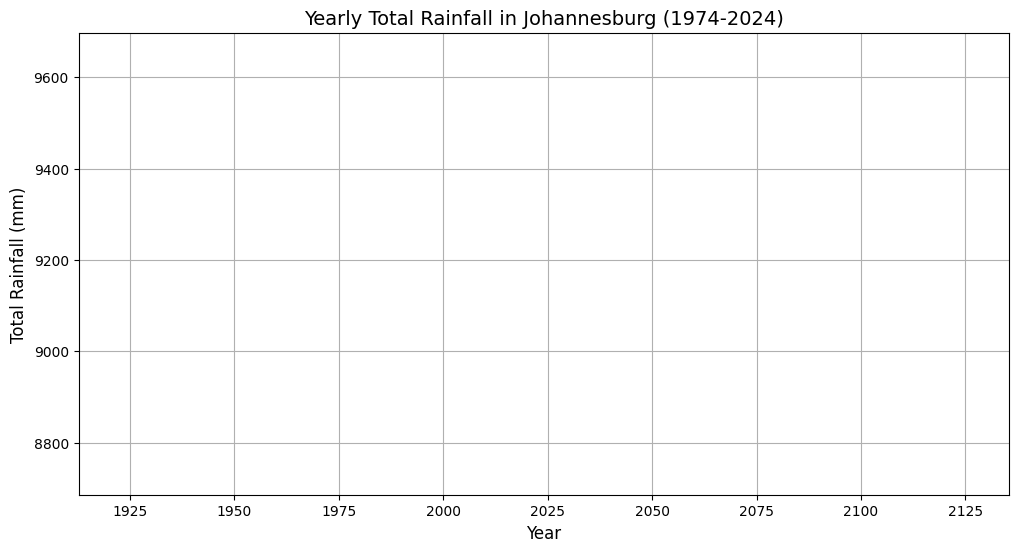

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import ee

# Get the start and end years from the filtered dataset.
start_year = ee.Date(chirps_dataset.first().get('system:time_start')).get('year').getInfo()
end_year = ee.Date(chirps_dataset.sort('system:time_start', False).first().get('system:time_start')).get('year').getInfo()

# Create a list of years.
years = ee.List.sequence(start_year, end_year).getInfo()

# Function to calculate yearly rainfall for the region of interest.
def calculate_yearly_rainfall(year):
  # Filter the collection for the current year.
  yearly_collection = chirps_dataset.filterDate(ee.Date.fromYMD(year, 1, 1), ee.Date.fromYMD(year, 12, 31))

  # Calculate the sum of rainfall for the year within the region of interest.
  # Use .sum() to mosaic and sum the images for the year.
  yearly_sum = yearly_collection.sum().reduceRegion(
      reducer=ee.Reducer.sum(),
      geometry=johannesburg_roi,
      scale=5566 # CHIRPS resolution is 0.05 degrees, approximately 5.5 km at the equator
  ).get('precipitation') # Assuming the band name is 'precipitation'

  return [year, yearly_sum]

# Map the function over the list of years to get yearly rainfall data.
yearly_rainfall_list = ee.List(years).map(calculate_yearly_rainfall).getInfo()

# Convert the results to a pandas DataFrame.
df_yearly_rainfall = pd.DataFrame(yearly_rainfall_list, columns=['Year', 'Total Rainfall (mm)'])

# Remove rows with None values (years with no data).
df_yearly_rainfall = df_yearly_rainfall.dropna()

# Sort by year for a proper time series plot.
df_yearly_rainfall = df_yearly_rainfall.sort_values(by='Year')

# Create the time series plot.
plt.figure(figsize=(12, 6))
plt.plot(df_yearly_rainfall['Year'], df_yearly_rainfall['Total Rainfall (mm)'])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)
plt.title('Yearly Total Rainfall in Johannesburg (1974-2024)', fontsize=14)
plt.grid(True)
plt.show()

### Subtask:
Calculate yearly total rainfall for the Johannesburg region.

**Reasoning**:
Group the filtered CHIRPS dataset by year and apply the sum reducer to calculate the total rainfall for each year.

In [27]:
# Map a function over the collection to add a 'year' property to each image.
def add_year(image):
  return image.set('year', ee.Date(image.get('system:time_start')).get('year'))

chirps_with_year = chirps_dataset.map(add_year)

# Group the collection by the 'year' property and calculate the sum of rainfall for each year.
yearly_rainfall = chirps_with_year.reduceColumns(
    ee.Reducer.sum().repeat(1),  # Sum reducer for the rainfall band (assuming it's the first band)
    ['year'] # Group by the 'year' property
)

# Print the resulting yearly rainfall data.
# Note: For large datasets, getInfo() might time out. Consider exporting the data instead.
print('Yearly total rainfall (mm):', yearly_rainfall.getInfo())

Yearly total rainfall (mm): {'sum': [135608]}
